# Test Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from my_measures import BinaryClassificationPerformance
%matplotlib inline
from tqdm import tqdm

### Read raw test data

In [2]:
amazon = pd.read_csv('/Users/working/Documents/ParsonsSchool/Sp19/MachineLearning/DATASET/amazon_data/Aaron_test_amazon.csv')

print(amazon.shape)

(113454, 14)


In [3]:
print(amazon.loc[0, "Text"])

This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.


In [4]:
print(amazon.head())
print(amazon['helpful'].mean())

   Unnamed: 0  Unnamed: 0.1  Id   ProductId          UserId  \
0           9             9  10  B00171APVA  A21BT40VZCCYT4   
1          23            23  24  B001GVISJM   AJ613OLZZUG7V   
2          30            30  31  B003F6UO7K   AFM0O9480F04W   
3          31            31  32  B003F6UO7K  A31OQO709M20Y7   
4          36            36  37  B001EO5QW8  A1MYS9LFFBIYKM   

                ProfileName  HelpfulnessNumerator  HelpfulnessDenominator  \
0             Carol A. Reed                     0                       0   
1                    Mare's                     0                       0   
2                   Sherril                     0                       0   
3   Molly V. Smith "staral"                     0                       1   
4  Abby Chase "gluten free"                     2                       2   

   Score        Time                      Summary  \
0      5  1351209600             Healthy Dog Food   
1      5  1304467200                    Twizzlers   

## Lemmatization 

### Important : Gensim library lemmatization requires Python version 3.6 and ‘pattern’ package is installed.
[Pattern installation guide](https://github.com/clips/pattern)
#### Before run this note

1. Using Python 3.6(create environment in Anaconda) in activate in Anaconda or 
command line: source activate nameOfPythonEnv 
2. Install Gensim and Pattern in python 3.6



In [5]:
#Lemmatization 
from gensim.utils import lemmatize
print('**************************************************')
amaLemma=[]
for w in tqdm(amazon['Text']):
    amaLemma.append([wd.decode('utf-8').split('/')[0] for wd in lemmatize(w)])

  0%|          | 0/113454 [00:00<?, ?it/s]

**************************************************


100%|██████████| 113454/113454 [13:07<00:00, 144.07it/s]


In [6]:
amaNp=np.array(amaLemma)
amaDF=pd.DataFrame(amaNp)

# amaDF.to_csv('/Users/working/Documents/ParsonsSchool/Sp19/MachineLearning/DATASET/amazon_data/AmazonLemmatizedTestingwithStopWords.csv')
print(amaDF)

                                                        0
0       [be, very, healthy, dog, food, good, digestion...
1       [love, candy, weight, watcher, have, cut, back...
2       [have, never, be, huge, coffee, fan, however, ...
3       [offer, be, great, price, great, taste, thank,...
4       [celiac, disease, product, be, lifesaver, be, ...
5       [order, wife, be, reccomend, daughter, have, a...
6       [variety, pack, taste, great, br, br, have, mo...
7       [mccann, oatmeal, be, good, quality, choice, f...
8       [oatmeal, be, not, good, mushy, soft, don, qua...
9       [great, product, nice, combination, chocolate,...
10      [watch, price, assortment, be, good, do, get, ...
11      [albanese, gummi, bear, ring, so, be, very, go...
12      [taste, really, good, have, be, purchase, diff...
13      [peppermint, stick, be, delicious, fun, eat, d...
14      [great, gift, age, purchase, giant, cane, befo...
15      [know, product, title, say, molecular, gastron...
16      [year,

In [7]:
#JOIN LIST TO STR

amaDFOut = amaDF[0].apply(' '.join)
print(amaDFOut.head())


0    be very healthy dog food good digestion also g...
1    love candy weight watcher have cut back still ...
2    have never be huge coffee fan however mother p...
3    offer be great price great taste thank amazon ...
4    celiac disease product be lifesaver be better ...
Name: 0, dtype: object


### Feature extraction on natural language data

In [8]:
# # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# corpus = amazon.Text.as_matrix()
# X_bag_of_words = vectorizer.fit_transform(corpus)
# print(X_bag_of_words.toarray())
hv = joblib.load('vectorizer.pkl')
X_hv = hv.transform(amaDFOut)
print(X_hv.shape)

(113454, 76362)


In [9]:
# # vectorize Bag of Words from review text; as sparse matrix
# # from sklearn.feature_extraction.text import HashingVectorizer
# # hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)
# hv = joblib.load('hv.pkl')
# #X_hv = hv.transform(amazon.Text)
# X_hv = hv.transform(amaDFOut)
# print(X_hv.shape)
# # print(hv.shape)

In [10]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
# from sklearn.feature_extraction.text import TfidfTransformer
# transformer = TfidfTransformer()
transformer = joblib.load('transformer.pkl')
X_tfidf = transformer.transform(X_hv)

In [11]:
print(type(X_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


### Time Converting 

In [12]:
import datetime


amazon['amaRead'] = amazon['Time'].apply(datetime.datetime.fromtimestamp)
amazon['amaMonth'] = amazon['amaRead'].apply(datetime.datetime.strftime, format=("%m"))
amazon['amaMonth'] = amazon['amaMonth'].apply(int)
amazon['amaDay'] =amazon['amaRead'].apply(datetime.datetime.weekday)#is , format=("%A"))


amazon['amaYear']=amazon['amaRead'].apply(datetime.datetime.strftime, format=("%Y"))
amazon['amaYear']= amazon['amaYear'].apply(int)
# amazon['readableamaDay'] =amazon['amaRead'].apply(datetime.datetime.strftime , format=("%A"))
# print(amazon['amaRead'].tail(10))
print(amazon['amaMonth'].tail(10))
print(amazon['amaDay'].head(10))
print(amazon['amaYear'].head(10))


113444     7
113445     9
113446     1
113447     4
113448     6
113449     5
113450     7
113451     6
113452    11
113453     3
Name: amaMonth, dtype: int64
0    3
1    1
2    6
3    3
4    2
5    1
6    3
7    0
8    0
9    3
Name: amaDay, dtype: int64
0    2012
1    2011
2    2011
3    2010
4    2007
5    2011
6    2011
7    2009
8    2008
9    2011
Name: amaYear, dtype: int64


### Create additional quantitative features

In [13]:
# features from Amazon.csv to add to feature set
amazon['reviewLen'] = amazon['Text'].str.len()
amazon['reviewLenAfterLe'] = amaDFOut.str.len()
# X_quant_features = amazon[["Score", "reviewLen"]]
# X_quant_features = amazon[["Score", "reviewLen","amaDay","amaHour"]]
amazon['revPlusScore']=  amazon['reviewLen']*amazon['Score']
amazon['revLenMinLe']=amazon['reviewLen']-amazon['reviewLenAfterLe']

X_quant_features = amazon[["reviewLen","Score","reviewLenAfterLe","amaDay", "amaMonth", "revPlusScore", "amaYear","revLenMinLe"]]

print(X_quant_features.head(10))
print(type(X_quant_features))

   reviewLen  Score  reviewLenAfterLe  amaDay  amaMonth  revPlusScore  \
0        137      5                93       3        10           685   
1         92      5                58       1         5           460   
2        503      5               335       6         2          2515   
3        104      5                71       3        10           520   
4        245      5               148       2         9          1225   
5        341      5               219       1         9          1705   
6        654      5               440       3         4          3270   
7        193      5               130       0        10           965   
8         89      1                55       0         2            89   
9        166      5               114       3        11           830   

   amaYear  revLenMinLe  
0     2012           44  
1     2011           34  
2     2011          168  
3     2010           33  
4     2007           97  
5     2011          122  
6     2011    

### Combine all quantitative features into a single sparse matrix

In [14]:
from scipy.sparse import csr_matrix, hstack
X_quant_features_csr = csr_matrix(X_quant_features)
X_combined = hstack([X_tfidf, X_quant_features_csr])
X_matrix = csr_matrix(X_combined) # convert to sparse matrix
print(X_matrix.shape)

(113454, 76370)


### Create `X`, scaled matrix of features

In [15]:
# feature scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler(with_mean=False)
sc = joblib.load('sc.pkl')
X = sc.transform(X_matrix)
print(X.shape)

(113454, 76370)


## Redefine what is helpful (y) 

In [16]:
amazon['myhelpful']=np.where((amazon['HelpfulnessDenominator'] >= 1),True, False)

### create `y`, vector of Labels

In [17]:
# y = amazon['helpful'].values
y = amazon['myhelpful'].values
print(type(y))

<class 'numpy.ndarray'>


In [18]:
# MODEL: Decision Tree Classifier
# from sklearn import tree
# dtc = tree.DecisionTreeClassifier(max_depth=100)
# dtc.fit(X_matrix, y)
# joblib.dump(dtc, 'dtc.pkl') # pickle
dtc = joblib.load('dtc.pkl')s

dtc_performance = BinaryClassificationPerformance(dtc.predict(X_matrix), y, 'dtc')
dtc_performance.compute_measures()
print(dtc_performance.performance_measures)

{'Pos': 59724, 'Neg': 53730, 'TP': 45412, 'TN': 39759, 'FP': 13971, 'FN': 14312, 'Accuracy': 0.7507095386676539, 'Precision': 0.764730646818113, 'Recall': 0.7603643426428237, 'desc': 'dtc'}


### ROC plot performance of models and fits

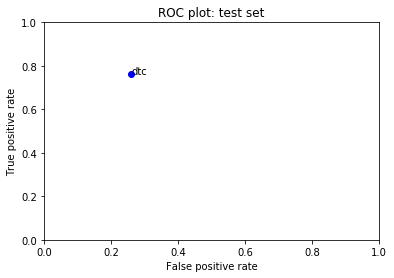

In [20]:
fits = [dtc_performance]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ridge Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [25]:
amazon.loc[0, "Text"]

"strong taste but good! In my opinion it's not exactly a substitute for coffee but tastes really good mixed together."

In [27]:
amazon.loc[0, "helpful"]

False

In [28]:
dtc_predictions = dtc.predict(X_matrix)

In [29]:
dtc_predictions.shape

(91000,)

In [30]:
print(dtc_predictions)

[False  True False ... False False False]


In [31]:
# false positives

import random, time

for i in range(0, len(dtc_predictions)):
    if (dtc_predictions[i] == True):
        if (amazon.loc[i, "helpful"] == False):
            if (random.uniform(0, 1) < 0.05):
                print(i)
                print(time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(amazon.loc[i, "Time"])))
                print(amazon.loc[i, "Score"])
                print(amazon.loc[i, "HelpfulnessDenominator"])
                print(amazon.loc[i, "ProductId"])
                print(amazon.loc[i, "Text"])
                print('* * * * * * * * * ')

118
2011-09-18 00:00:00
2
1
B0028W3OEC
We were hoping for a strong cinnamon tea, but this one is rather mild. It also has more black tea taste than cinnamon.
* * * * * * * * * 
153
2004-12-18 00:00:00
5
1
B00032GP1S
I enjoy all of Near East's versions of couscous, and the roasted garlic and olive oil is no exception. The blend of spices is subtle yet tasty, the recipe is quick and easy to make (boil water, stir in couscous, let sit for 5 minutes), and the result is healthy and delicious. It also keeps well in the refrigerator once cooked (this is only a concern if you are making the couscous for one person!). What more could you want?
* * * * * * * * * 
158
2012-02-09 00:00:00
5
1
B00020HHRW
I ordered this product because of the Dr Oz show for anti-aging, a nice by product is I swear my knee pain has improved since I started drinking a cup a day, oh yeah and it taste good.
* * * * * * * * * 
215
2011-11-07 00:00:00
5
1
B000WFPOHW
The price per bag is more expensive but you feed your do

7152
2007-07-24 00:00:00
5
7
B000MGR2XK
Now continues to conduct itself in excellence. I use the keenwa for sprouting and have found Now's product to be of the highest quality.<br />Thanks for your excellent service.
* * * * * * * * * 
7244
2007-04-11 00:00:00
4
1
B000EDK67K
This non-fat dry milk powder tastes delicious -- much better than the stuff available on the regular grocery shelves, it works great in cooking and baking, and you can't beat the shelf life.
* * * * * * * * * 
7249
2011-08-08 00:00:00
5
0
B001EO69SS
I had not been able to find Black Rice in any specialty store in our area.  This was perfectly delicious.
* * * * * * * * * 
7282
2010-07-20 00:00:00
5
3
B002N723Q2
Now, I don't presume to say that this is a tea for everyone. I don't quite get it, but obviously, considering the reviews on the t-bag version of this item (<a href="http://www.amazon.com/gp/product/B002AR14WO">Numi Organic Tea Chocolate Puerh, 16-Count Full Leaf Tea Bags (Pack of 2)</a>), many people don't 

15564
2010-10-05 00:00:00
5
3
B000G0EP78
I love this product, its excellent and can be used in a zillion ways from pizza crust, scones, pancakes, bars, etc etc I love it and it has been a lifesaver as a diabetic. The rest of my family can't tell when I use this that its low carb! Makes a great Red Lobster cheddar bay bisquet!! Better than RL. BUT people please shop around, this price is outragous.<br />I love you Amazon and you have given me hundreds of great deals but not on this. Go to Netrition.com and its only 11.99 for exactly the same amount. A huge savings! I just hate to see people not try this product because of the price on this site.
* * * * * * * * * 
15676
2006-12-31 00:00:00
5
2
B000FFQ1VW
When my mother-in-law purchased "light" rice bread, I expected it to be even worse than the regular rice bread we had been tolerating.  However, I was in for a pleasent surprise!  This bread is much lighter than the very dense rice bread made by EnerG.  It still tastes better toasted, b

23620
2012-09-02 00:00:00
5
0
B0054S0YTK
After a local store (where I used to buy five beans for around $10) closed, I thought "why not check online" since I am buying more and more things that way. I found this place through Amazon and took a chance at getting a pound of beans. They arrived quickly and are absolutely beautiful! I may have underestimated how many vanilla beans are in a "pound," as this is more than I need for now. So I've repackaged and sealed them to save for later. (You can separate them into smaller amounts and double-bag them in those Ziploc vacuum bags. They'll last forever. Even when they are no longer at their peak, you can still use them for flavoring.) I'm very happy with the purchase and the quality of the beans and will probably only buy from this place from now on. Good job, Vanilla Products USA!
* * * * * * * * * 
23730
2012-09-13 00:00:00
1
4
B006045OCY
I love this peanut butter, but was not well treated by this vendor.  When I received my order, one of t

Carmelina brands are imported directly from Italy and boy does the quality show. The beans are always firm, buttery inside and colorful without color and firmness retention additives. The Red Kidney beans are no exception to that rule. Yes, a few cans get dented but you are getting something from Italy and it is AUTHENTIC without a bunch of crap in it. Unless a can is bulging or leaking there is NO problem with the canned contents.<br /><br />Viva Italia!<br /><br />Dear Amazon.com,<br /><br />I love you guys! Please keep importing Carmelina brand products! They are top notch!
* * * * * * * * * 
30623
2012-03-22 00:00:00
3
1
B002BCFI70
I was a little dissapointed. It tastes  good. It is just a little watery tasting. Land of the lakes is better. But they dont have sugar free. So for sugar free I can give a heads up on this product.
* * * * * * * * * 
30631
2012-10-04 00:00:00
5
1
B001LO1A0S
This stuff is so good, and with a little lemon squeeze, it's over the top.<br />Want a fast delic

39347
2008-10-21 00:00:00
5
1
B001QE7J2G
My dogs started on Canidae 3 years ago. All of them had a dramatic change in energy and coat. They have done wonderfully on the food since. There has been a lot of negative attention recently with the formula change but I have yet to have any trouble with my 4 on the new formula. They continue to eat it and do well. They had no stool problems, itchiness, vomiting that others have suggested. I am still quite pleased with Canidae and will continue to use it for all of my dogs.
* * * * * * * * * 
39424
2011-11-24 00:00:00
5
0
B001O2HB9Q
My son loves all of the Earth's Best products and he especially loves the fruit blends.  I love that he's getting plenty of vitamins and antioxidants from this one.
* * * * * * * * * 
39477
2011-09-27 00:00:00
5
1
B000R4G4TU
I was really upset when my local store quit carrying this tea. I found another place to buy it but it cost twice as much. When I found it on Amazon I was thrilled because it cost me less than my

46269
2009-08-04 00:00:00
3
4
B008J1HO4C
I cooked this Irish porridge with Soy Dream soy milk instead of water, since my family and I like oatmeal (with rolled oats) with this milk, and let it simmer for 25 minutes. I added 2 tsps of brown sugar, as somebody suggested, and some raisins. I absolutely loved it, and devoured it in a couple of minutes, going back for more. My wife, however, did not like it, and said that the texture is like what she imagines it would feel like in your mouth if one were to eat bugs!!! So, as you see, it's all a matter of opinion, or taste buds. I imagine this product is one of those that, either you love it, or hate it! Enrique and Paula, Lakeville, MN
* * * * * * * * * 
46274
2010-11-08 00:00:00
5
1
B0047P3UWY
I've been waiting to try these for a long time, and finally found them on Amazon.com.  I know they now sell them in New York City as well.  They are delicious, and I just ordered a box for my mom who has a gluten allergy.  She is going to love them!


1
B0058AMYTC
Smiles... Thank you Lord, for I have found another healthy snack food that is unsalted, and tastes great. I almost gave up on finding a potato chip like this. The only thing i would ask Kettle to change is the texture. It's slightly hard/crunchy, but not a problem at all. I would just prefer it to be softer. Kettle if you do make that happen, please keep everything else the same. Thank you.
* * * * * * * * * 
52749
2010-09-02 00:00:00
1
10
B002Y2OWII
The worst coffee I ever bought. As soon as I opened the bag, I know what a terrible mistake I made buying three bags of cheap coffee. It smelled foul, it expires within 1 month of purchase, and it definitely contains more than just grounded coffee beans (leaves, branches etc). But I still tried to brew the coffee, I brewed one with a french press, terrible taste. And then I tried to brew it with a Moka, still terrible. So now they are where they belong, the garbage bin. I don't know if my three bags of coffee all happened to b

Possibly the best tasting lollipop ever and certainly the closest you'll ever get to a healthy one!
* * * * * * * * * 
60447
2012-04-28 00:00:00
1
6
B004WBBEFI
$8.98 for 1 pack?!?  That should be the price for a 6 pack.  Be careful and dont order only one for that price!
* * * * * * * * * 
60491
2012-05-25 00:00:00
3
1
B008ZRKZSM
I purchased this item mostly out of curiosity.  I have been hearing about it and people that are on a strict diet trying to lose weight often rave about it.  To me I will never use it as just straight peanut butter on a cracker or bread.  I do believe it is good to put in smoothies, if you want peanut butter in your smoothie.  You can vary the consistency depending on  how much water you use.  For smoothie, you can just add the powder right into your blender.  The taste to me is rather bland.  Sure-obviously it is missing the FAT- but it is lacking in something else as well...just can't put my finger on it...
* * * * * * * * * 
60505
2009-03-19 00:00:00
5
0
B0

2011-07-22 00:00:00
5
2
B000BY9AJM
These bones are larger than the ones you can purchase at Petsmart and they are individually wrapped just like at Petsmart.  My dog loves them.  I will definitely buy from here again.  Funny story about these, my dog is never tied up b/c of our underground electric fence.  The UPS driver left this box with 6 bones on the front porch.  My dog has never ever touched a box that was delivered.  But I guess he smelled the bones inside.  When I got home he had three of the bones out laying on our front porch with him and he left three in the box.  I couldn't punish him for this b/c he knew the smell and the package was for him.
* * * * * * * * * 
68550
2010-09-17 00:00:00
5
0
B001CJSW5S
I received my cake fresh and moist and delicious.  I think I will try the banana flavor next. 33 oz is a substantial size and will feed 8 adults easy.  I loved it.
* * * * * * * * * 
68611
2011-06-19 00:00:00
5
1
B0070PV73M
It took my dogs a minute the very first time I gave 

B002IGKG0I
The name of the company is Oskri Organics.  Not everything they sell is organic, however.  These are an example.  Look for the USDA label to make sure.<br /><br />I think these taste fantastic and are very filling.  Its hard to finish the package.  My wife does not care for them, so your taste may vary as well.  If you like other Oskri products, chances are you will like these.  Read the ingredients.  If you like all of them, you should like these.
* * * * * * * * * 
75176
2012-03-16 00:00:00
2
2
B006DQZ04Q
I use Nespresso Roma, and my wife uses Nespresso Ristretto.  We bought Cremosa and Espressivo as possible substitutes, because lower per-capsule price, free shipping with my Amazon Prime, and I don't have to use the Outpresso to recycle.  But we don't like the coffee. Others may prefer it, I'm sure, but its not for us. Too weak,  and we don't like the flavor.  The Cremosa is especially watery versus Nespresso.  I'm cheap and maybe not as picky  so I will use them up over 

83158
2011-04-10 00:00:00
5
2
B000WFEMHK
This is an excellent product for cats, it came highly recommended from a vet about 6 or 7 years ago when I had an immune compromised cat. It was the only food that she could eat and keep down, causing her to finally gain weight after losing enough to be life-threatening. That kitty has since passed on, but I put my kitties back on it about 6 months ago and their coats look great, they are more active, and my kitty with sensitive stomach throws up much less. I even received the product from the seller a few days earlier than expected.
* * * * * * * * * 
83182
2011-12-27 00:00:00
5
0
B00474328W
This is a great alternative to soda! The only problem I found is that it tastes slightly bitter so it makes my stomach feel acidic, but I tried flavoring and it doesn't bother me as much.<br /><br />I found that grocery stores sell this for less, though.
* * * * * * * * * 
83240
2009-08-26 00:00:00
5
2
B005TRIV1Y
My five finicky guys, (dogs), love this trea

90346
2011-10-16 00:00:00
5
0
B000V17MLS
Even though it seemed to have mostly great reviews, I didn't have super high expectations for this packet mix...but it ended up knocking my socks off! It had a really nice taste with just enough hint of heat to be tasty but not overpowering. I do have a cooking suggestion, however--I followed the directions to the T (I always do the first time I make something like this) and I ended up having a hard time mixing the paste in quick enough because it really is a thick paste and it took more time that I thought for it to break down and my water was boiling away. Or something like that--I made it a few days ago and my memory isn't that great, but I just remember thinking that the next time, I'd pre-mix the water and paste outside of the pan first to make sure it's all reconstituted nicely with no lumps. I don't think there is any way you could get all the lumps out if you put the chicken in at the same time as the paste packet. ANYWAY, we had it with